In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
sns.set()

In [2]:
data = pd.read_csv("data/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
from sklearn.model_selection import train_test_split
X = data.drop('SalePrice', axis=1)
y = data.SalePrice
X_train, X_val ,y_train, y_val = train_test_split(X,y, random_state=16)
full_X_train = pd.concat([X_train,y_train],axis=1)

In [4]:
X_train.shape

(1095, 80)

In [5]:
X_train.isnull().sum().sort_values()

Id                0
BsmtUnfSF         0
TotalBsmtSF       0
SaleType          0
HeatingQC         0
               ... 
FireplaceQu     522
Fence           874
Alley          1028
MiscFeature    1053
PoolQC         1091
Length: 80, dtype: int64

In [6]:
columns_dropped = list(X_train.loc[:,X_train.isnull().sum()>100].columns)
columns_dropped

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [7]:
#Lot frontage and alley are included in totat lot.
#fire place is innecesary

In [8]:
#dropping columns with lot of NA values
X_train_edit = X_train.drop(columns_dropped,axis=1)

In [9]:
X_train_edit.isnull().sum().sort_values()

Id               0
SaleType         0
Heating          0
HeatingQC        0
CentralAir       0
                ..
GarageYrBlt     57
GarageQual      57
GarageCond      57
GarageType      57
GarageFinish    57
Length: 74, dtype: int64

It would be better to summarise all the Garage features into a single one
From data desc, 'GarageCars: Size of garage in car capacity' is best, describing both has_garage and its size.
Garage condition remains in doubt
'GarageCond'

In [10]:
X_train_edit = X_train_edit.drop(['GarageType','GarageYrBlt','GarageFinish','GarageArea','GarageCond'], axis=1)

In [11]:
cat_cols = [cname for cname in X_train_edit.columns if
                    X_train_edit[cname].nunique() < 10 and 
                    X_train_edit[cname].dtype == "object"]

num_cols = [cname for cname in X_train_edit.columns if 
                X_train_edit[cname].dtype in ['int64', 'float64']]

Very few samples have different 'GarageCond' and 'GarageQual', so we will use only one

In [12]:
X_train_edit[cat_cols]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,...,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageQual,PavedDrive,SaleType,SaleCondition
678,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Y,New,Partial
1340,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,GasA,TA,Y,SBrkr,TA,Typ,TA,Y,WD,Normal
1075,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,GasA,TA,Y,SBrkr,TA,Typ,TA,Y,CWD,Normal
1130,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,GasA,TA,Y,SBrkr,Gd,Min2,TA,Y,WD,Normal
1210,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,GasA,Gd,Y,FuseA,Fa,Typ,TA,Y,WD,Normal
581,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Y,New,Partial
121,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,GasA,Gd,Y,SBrkr,TA,Typ,TA,P,WD,Normal
1262,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,GasA,Ex,Y,FuseA,TA,Min2,TA,Y,WD,Normal


In [13]:
X_train_edit[cat_cols].nunique().sort_values()

Street           2
Utilities        2
CentralAir       2
PavedDrive       3
LandSlope        3
BsmtCond         3
KitchenQual      4
ExterQual        4
MasVnrType       4
BsmtExposure     4
BsmtQual         4
LandContour      4
LotShape         4
Electrical       4
HeatingQC        5
GarageQual       5
MSZoning         5
ExterCond        5
BldgType         5
LotConfig        5
BsmtFinType1     6
BsmtFinType2     6
Heating          6
RoofStyle        6
Foundation       6
SaleCondition    6
RoofMatl         7
Condition2       7
Functional       7
HouseStyle       8
SaleType         9
Condition1       9
dtype: int64

In [14]:
#doesn't seem to be a num feature being considered a categorical one
#let's ordinal encode the features meant from the data_description to have a numeric order, and one hot encode the rest

In [15]:
#avoiding dirty data in test or new instances
for col in cat_cols:
    X_train_edit[col] = X_train_edit[col].str.lower()
X_train_edit[cat_cols]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,...,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageQual,PavedDrive,SaleType,SaleCondition
678,rl,pave,ir1,lvl,allpub,inside,gtl,norm,norm,1fam,...,gasa,ex,y,sbrkr,gd,typ,ta,y,new,partial
1340,rl,pave,reg,lvl,allpub,inside,gtl,norm,norm,1fam,...,gasa,ta,y,sbrkr,ta,typ,ta,y,wd,normal
1075,rl,pave,reg,lvl,allpub,inside,gtl,norm,norm,1fam,...,gasa,ta,y,sbrkr,ta,typ,ta,y,cwd,normal
1130,rl,pave,reg,lvl,allpub,inside,gtl,norm,norm,1fam,...,gasa,ta,y,sbrkr,gd,min2,ta,y,wd,normal
1210,rl,pave,reg,lvl,allpub,inside,gtl,norm,norm,1fam,...,gasa,ex,y,sbrkr,gd,typ,ta,y,wd,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,rm,pave,reg,lvl,allpub,inside,gtl,norm,norm,1fam,...,gasa,gd,y,fusea,fa,typ,ta,y,wd,normal
581,rl,pave,reg,lvl,allpub,inside,gtl,norm,norm,1fam,...,gasa,ex,y,sbrkr,ex,typ,ta,y,new,partial
121,rm,pave,reg,lvl,allpub,inside,gtl,norm,norm,1fam,...,gasa,gd,y,sbrkr,ta,typ,ta,p,wd,normal
1262,rl,pave,reg,lvl,allpub,inside,gtl,norm,norm,1fam,...,gasa,ex,y,fusea,ta,min2,ta,y,wd,normal


In [16]:
# BsmtExposure FireplaceQu
#not : poolqc FireplaceQu', 'GarageCond'
qc_order = {"na":0,"po":1, "fa":2, "ta":3,'gd':4,'ex':5}
col_to_ordinal = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual']
X_train_edit[col_to_ordinal] = X_train_edit[col_to_ordinal].replace(qc_order)

In [17]:
catcol_wout_ordinal = cat_cols
for col in col_to_ordinal:
    if col in catcol_wout_ordinal:
        catcol_wout_ordinal.remove(col)

In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse= False,handle_unknown='ignore')

In [19]:
ohed_col = pd.DataFrame(ohe.fit_transform(X_train_edit[catcol_wout_ordinal]))
ohed_col.index = X_train_edit.index
X_train_edit = X_train_edit.drop(catcol_wout_ordinal, axis=1)
X_train_edit = pd.concat([X_train_edit, ohed_col], axis=1)

In [20]:
X_train_edit

,Id,MSSubClass,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,...,125,126,127,128,129,130,131,132,133,134
678,679,20,11844,StoneBr,8,5,2008,2008,VinylSd,VinylSd,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1340,1341,20,8294,NAmes,4,5,1971,1971,MetalSd,MetalSd,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1075,1076,70,13125,Crawfor,7,6,1940,1984,Wd Sdng,Wd Sdng,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1130,1131,50,7804,SWISU,4,3,1928,1950,WdShing,Plywood,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1210,1211,60,11218,SawyerW,6,5,1992,1992,Wd Sdng,Wd Sdng,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1346,30,6000,OldTown,4,4,1920,1950,MetalSd,MetalSd,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
581,582,20,12704,NridgHt,8,5,2008,2009,VinylSd,VinylSd,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
121,122,50,6060,IDOTRR,4,5,1939,1950,AsbShng,AsbShng,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1262,1263,50,11250,ClearCr,4,5,1957,1989,Wd Sdng,Wd Sdng,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Still remain cat columns with lot of != unique values

In [21]:
cat_cols2 = [cname for cname in X_train_edit.columns if
                    X_train_edit[cname].dtype == "object"]
cat_cols2

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [22]:
def bar_plot(column,plot=True):
    values = list(full_X_train[column].unique())
    values_mean = {}
    for value in values:
        values_mean[value] = full_X_train.loc[full_X_train[column] == value].SalePrice.mean()
    values_mean = dict(sorted(values_mean.items(), key = lambda item: item[1]))
    figure(figsize = (20, 6), dpi = 80)
    if plot == True:
        plt.bar(values_mean.keys(), values_mean.values());
    return values_mean

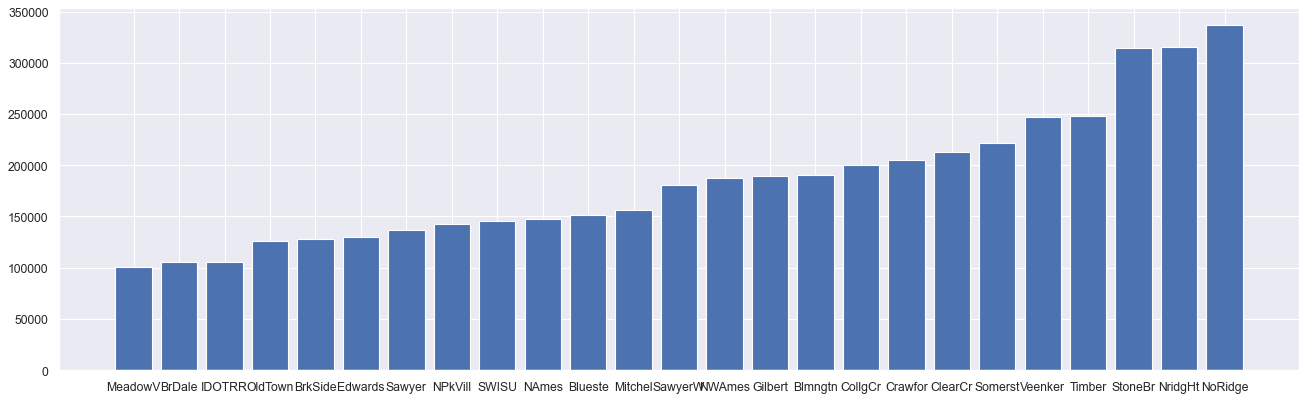

In [23]:
neighborhoods_mean = bar_plot('Neighborhood')

There seem to be some distinguible groups (first 3, next 9, next 8, next 2 and last 3)

In [24]:
g1 = [1,2,3,4,5]
g1[0] = list(neighborhoods_mean.keys())[:3]
g1[1] = list(neighborhoods_mean.keys())[3:13]
g1[2] = list(neighborhoods_mean.keys())[13:21]
g1[3] = list(neighborhoods_mean.keys())[21:23]
g1[4] = list(neighborhoods_mean.keys())[23:25]
g1

[['MeadowV', 'BrDale', 'IDOTRR'],
 ['OldTown',
  'BrkSide',
  'Edwards',
  'Sawyer',
  'NPkVill',
  'SWISU',
  'NAmes',
  'Blueste',
  'Mitchel',
  'SawyerW'],
 ['NWAmes',
  'Gilbert',
  'Blmngtn',
  'CollgCr',
  'Crawfor',
  'ClearCr',
  'Somerst',
  'Veenker'],
 ['Timber', 'StoneBr'],
 ['NridgHt', 'NoRidge']]

In [25]:
for x in range(len(g1)):
    X_train_edit.replace(g1[x], x,inplace=True)

In [26]:
X_train_edit.Neighborhood.value_counts()

1    544
2    366
4     87
0     52
3     46
Name: Neighborhood, dtype: int64

Successfully replaced values

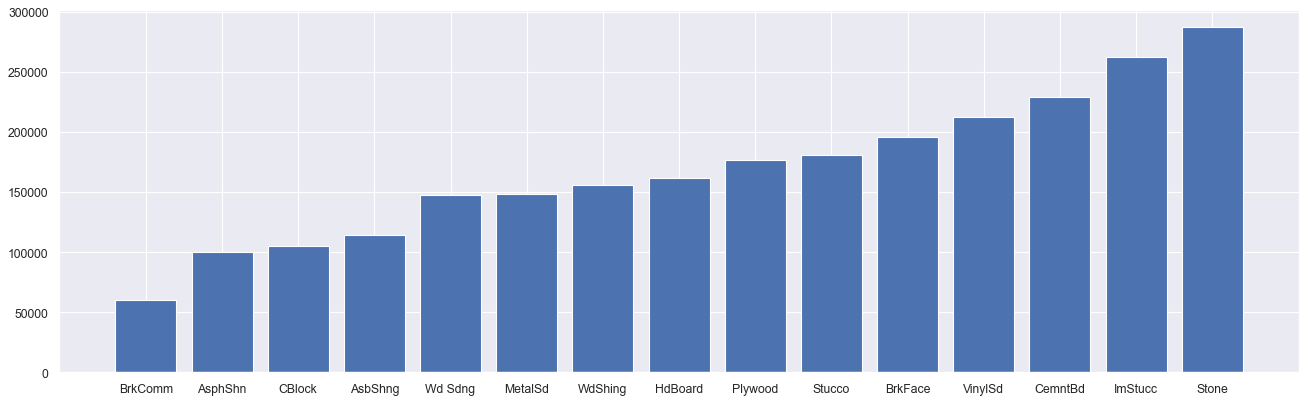

In [27]:
material_means = bar_plot('Exterior1st')

In [28]:
g2 = [0,1,2,3,4,5]
g2[0] = list(material_means.keys())[0]
g2[1] = list(material_means.keys())[1:4]
g2[2] = list(material_means.keys())[4:8]
g2[3] = list(material_means.keys())[8:11]
g2[4] = list(material_means.keys())[11:13]
g2[5] = list(material_means.keys())[13:]
g2

['BrkComm',
 ['AsphShn', 'CBlock', 'AsbShng'],
 ['Wd Sdng', 'MetalSd', 'WdShing', 'HdBoard'],
 ['Plywood', 'Stucco', 'BrkFace'],
 ['VinylSd', 'CemntBd'],
 ['ImStucc', 'Stone']]

In [29]:
for x in range(len(g2)):
    X_train_edit.replace(g2[x], x,inplace=True)

In [30]:
X_train_edit['Exterior1st'].value_counts()

2    513
4    422
3    140
1     17
5      2
0      1
Name: Exterior1st, dtype: int64

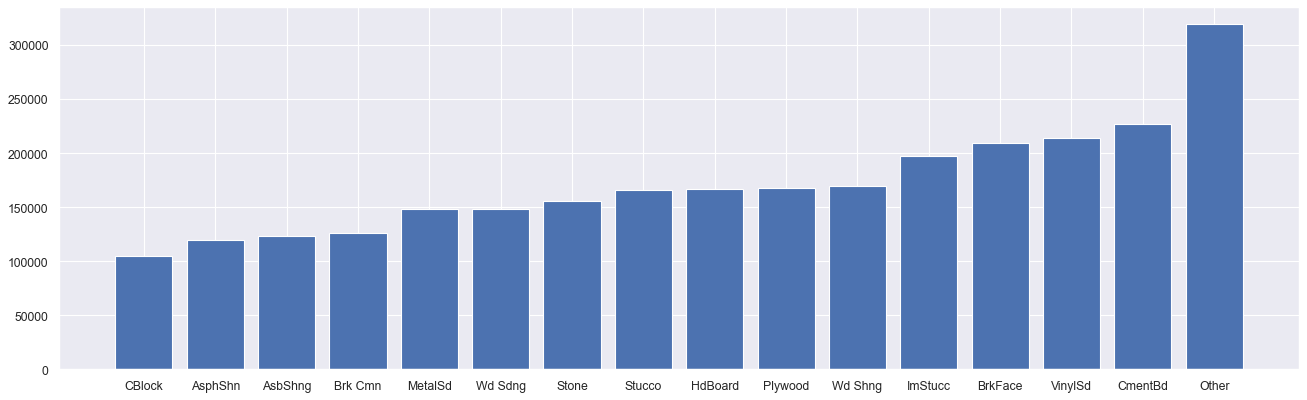

In [31]:
material_means2 = bar_plot('Exterior2nd')

dropping column

In [32]:
X_train_edit.drop('Exterior2nd',axis=1,inplace=True)

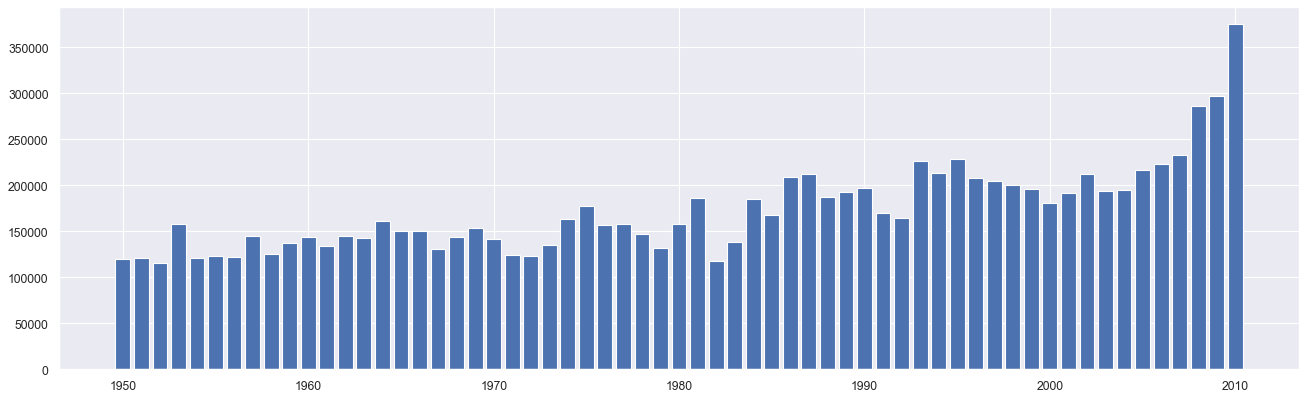

In [33]:
years_remod = bar_plot('YearRemodAdd')

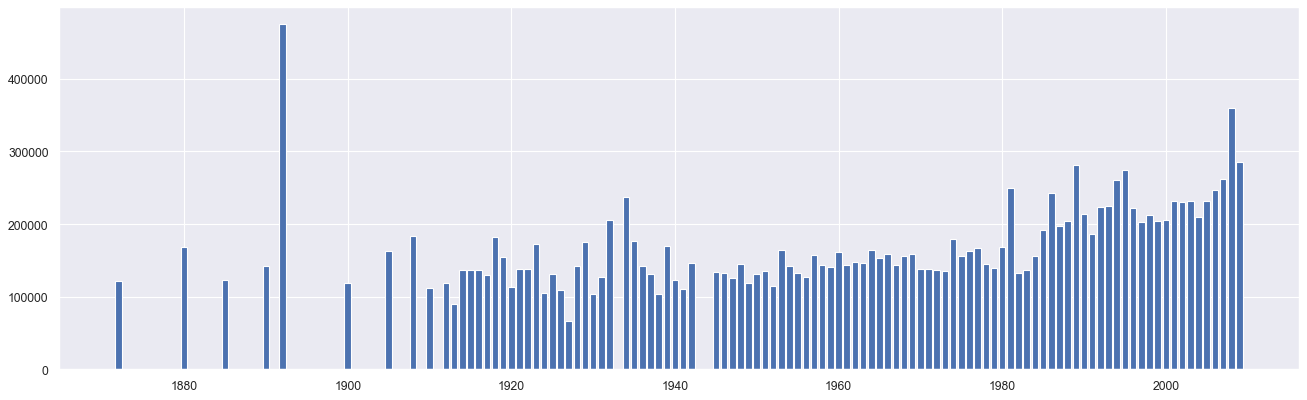

In [34]:
years_built= bar_plot('YearBuilt')

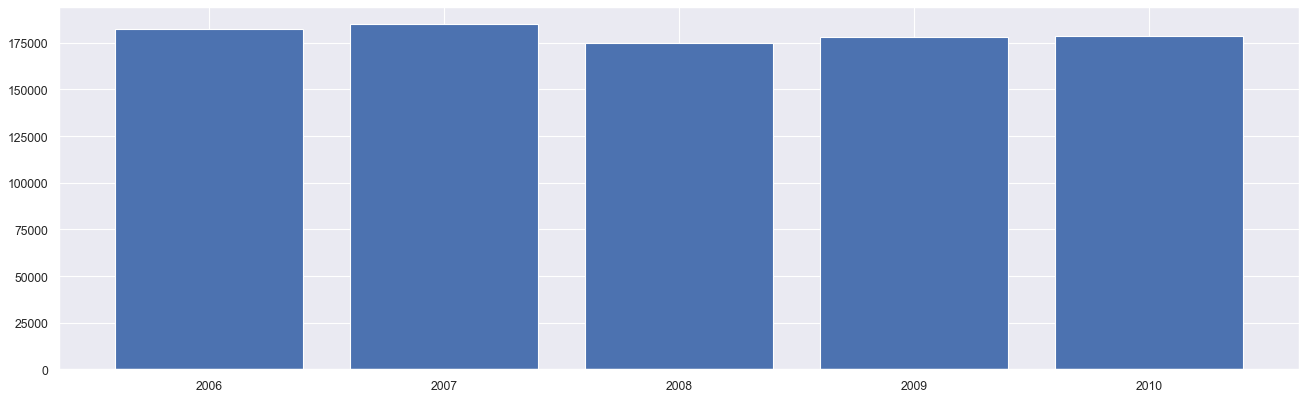

In [35]:
years_sold= bar_plot('YrSold')

No significant pattern. Dropping

In [36]:
X_train_edit = X_train_edit.drop(['YearRemodAdd','YearBuilt','MoSold', 'YrSold'] ,axis=1)
X_train_edit

,Id,MSSubClass,LotArea,Neighborhood,OverallQual,OverallCond,Exterior1st,MasVnrArea,ExterQual,ExterCond,...,125,126,127,128,129,130,131,132,133,134
678,679,20,11844,3,8,5,4,464.0,4,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1340,1341,20,8294,1,4,5,2,0.0,3,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1075,1076,70,13125,2,7,6,2,0.0,3,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1130,1131,50,7804,1,4,3,2,0.0,3,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1210,1211,60,11218,1,6,5,2,0.0,4,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1346,30,6000,1,4,4,2,0.0,3,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
581,582,20,12704,4,8,5,4,306.0,5,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
121,122,50,6060,0,4,5,1,0.0,3,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1262,1263,50,11250,2,4,5,2,0.0,3,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


Now I'll tackle the numerical data

In [37]:
from sklearn.impute import SimpleImputer
X_train_edit = X_train_edit.set_index('Id')
num_cols = [cname for cname in X_train_edit.columns if 
                X_train_edit[cname].dtype in ['int64', 'float64']]

imputer = SimpleImputer()
print(X_train_edit[num_cols])
imputed_X_train_edit = pd.DataFrame( imputer.fit_transform(X_train_edit[num_cols]))
imputed_X_train_edit.columns = X_train_edit.columns

      MSSubClass  LotArea  Neighborhood  OverallQual  OverallCond  \
Id                                                                  
679           20    11844             3            8            5   
1341          20     8294             1            4            5   
1076          70    13125             2            7            6   
1131          50     7804             1            4            3   
1211          60    11218             1            6            5   
...          ...      ...           ...          ...          ...   
1346          30     6000             1            4            4   
582           20    12704             4            8            5   
122           50     6060             0            4            5   
1263          50    11250             2            4            5   
682           50     4500             1            5            5   

      Exterior1st  MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  125  126  \
Id                    

C:\Users\zubik\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\zubik\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [38]:
#All ready for model validation!

In [39]:
imputed_X_train_edit

,MSSubClass,LotArea,Neighborhood,OverallQual,OverallCond,Exterior1st,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,125,126,127,128,129,130,131,132,133,134
0,20.0,11844.0,3.0,8.0,5.0,4.0,464.0,4.0,3.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,20.0,8294.0,1.0,4.0,5.0,2.0,0.0,3.0,3.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,70.0,13125.0,2.0,7.0,6.0,2.0,0.0,3.0,3.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,50.0,7804.0,1.0,4.0,3.0,2.0,0.0,3.0,3.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60.0,11218.0,1.0,6.0,5.0,2.0,0.0,4.0,3.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,30.0,6000.0,1.0,4.0,4.0,2.0,0.0,3.0,3.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1091,20.0,12704.0,4.0,8.0,5.0,4.0,306.0,5.0,3.0,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1092,50.0,6060.0,0.0,4.0,5.0,1.0,0.0,3.0,3.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1093,50.0,11250.0,2.0,4.0,5.0,2.0,0.0,3.0,3.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
#for X
def pipeline(data):
    columns_dropped = ['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
    data = data.drop(columns_dropped,axis=1)
    data = data.drop(['GarageType','GarageYrBlt','GarageFinish','GarageArea','GarageCond'], axis=1)
    cat_col = ['MSZoning','Street','LotShape',
     'LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
     'BsmtFinType2',
     'Heating',
     'HeatingQC',
     'CentralAir',
     'Electrical',
     'KitchenQual',
     'Functional',
     'GarageQual',
     'PavedDrive',
     'SaleType',
     'SaleCondition']
    for col in cat_col:
        data[col] = data[col].str.lower()
        
    qc_order = {"na":0,"po":1, "fa":2, "ta":3,'gd':4,'ex':5}
    col_to_ordinal = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual']
    data[col_to_ordinal] = data[col_to_ordinal].fillna("na")  #ACA
    data[col_to_ordinal] = data[col_to_ordinal].replace(qc_order)
    
    catcol_wout_ordinal = cat_cols
    for col in col_to_ordinal:
        if col in catcol_wout_ordinal:
            catcol_wout_ordinal.remove(col)
            
    ohed_col = pd.DataFrame(ohe.transform(data[catcol_wout_ordinal]))
    ohed_col.index = data.index
    data = data.drop(catcol_wout_ordinal, axis=1)
    data = pd.concat([data, ohed_col], axis=1)
    
    #ACA
    cat_cols2 = ['Neighborhood', 'Exterior1st', 'Exterior2nd']
    for x in range(len(g1)):
        data.replace(g1[x], x,inplace=True)
    for x in range(len(g2)):
        data.replace(g2[x], x,inplace=True)

    data = data.drop(['YearRemodAdd','YearBuilt','MoSold', 'YrSold'] ,axis=1)
    data = data.set_index('Id')
    num_cols = [cname for cname in data.columns if 
                data[cname].dtype in ['int64', 'float64']]


    imputed_data = pd.DataFrame( imputer.transform(data[num_cols]))
    
    # print(imputed_data)
    # imputed_data.columns = data.columns
    # imputed_data.columns = imputed_data.columns.astype(str)
    return imputed_data
#365 f 173 col

In [45]:
from sklearn.linear_model import LinearRegression 
linear_model = LinearRegression()
linear_model.fit(imputed_X_train_edit, y_train)
X_val_edit = pipeline(X_val)
# preds = .predict(X_val_edit)
# print(preds)
# print(y_val)
linear_model.score(X_val_edit, y_val)

C:\Users\zubik\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\zubik\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.6292775062125837

In [46]:
from sklearn.model_selection import cross_val_score

full_X_edit = pipeline(X)
scores_linear =  cross_val_score(LinearRegression(), full_X_edit, y)
scores_linear.mean()

C:\Users\zubik\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.6542183744474199

In [48]:
from sklearn.ensemble import RandomForestRegressor
def get_score(param):
    scores = cross_val_score(RandomForestRegressor(n_estimators=param),full_X_edit, y)
    return scores.mean()
values = [50*x for x in range(1,8)]
results = []
for x in values:
    results.append(get_score(x))

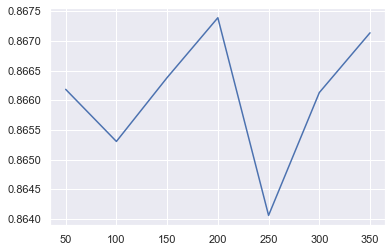

In [49]:
plt.plot(values,results);

not enough data

In [50]:
values2 = [20*x for x in range(1,17)]
results2 = []
for x in values2:
    results2.append(get_score(x))

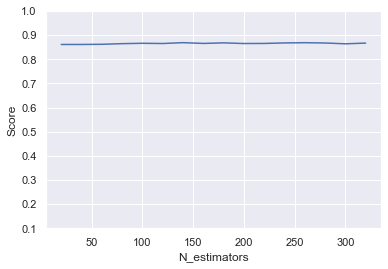

In [51]:
plt.plot(values2, results2);
plt.ylabel('Score')
plt.xlabel('N_estimators')
plt.yticks([0.1*x for x in range(1,11)])
plt.show();

Remains very constant on a large scale, let's zoom

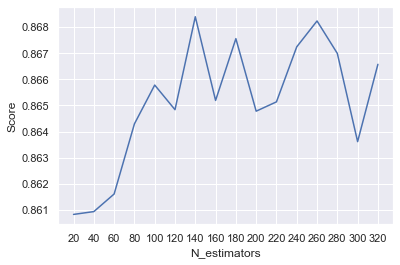

In [52]:
plt.plot(values2, results2);
plt.ylabel('Score')
plt.xlabel('N_estimators')
plt.xticks(values2)
plt.show();

except for 40, results are very constant. let's use 140

In [53]:
forest_model = RandomForestRegressor(n_estimators=140).fit(full_X_edit, y)

In [54]:
X_test = pd.read_csv("data/test.csv")
X_test_edit = pipeline(X_test)
preds = forest_model.predict(X_test_edit)

test_id = X_test['Id']

output = pd.DataFrame({'Id': test_id,
                       'SalePrice': preds})
output.to_csv('data/submission.csv', index=False)

C:\Users\zubik\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
